# 实际搭建并训练一个简单的神经网络

作者：杨岱川

时间：2019年12月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

参考文献：

- 《深度学习入门》，作者：斋藤康毅；
- 《深度学习》，作者：Ian Goodfellow 、Yoshua Bengio、Aaron Courville。
- [Keras overview](https://tensorflow.google.cn/guide/keras/overview)
- [PYTORCH TUTORIALS](https://pytorch.org/tutorials/)

### 学习回顾

在 [3.01 神经网络与前向传播](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.01%20神经网络与前向传播.ipynb) 中，我们学习了如何搭建一个三层的全连接神经网络，并且实现了它的前向传播过程。

在 [3.02 神经网络的训练](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.02%20神经网络的训练.ipynb)中，我们主要学习了如何使用数值微分的方法计算神经网络的梯度，并通过随机梯度下降法去优化神经网络的参数。

在 [3.03 误差反向传播法](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.03%20误差反向传播法.ipynb)中，我们主要学习了计算图的原理，以及如何使用计算图的**反向传播**高效地计算导数，并且实现了加法乘法以及部分简单函数的反向传播推导。

可以说到目前为止，全连接神经网络的最重要的几个数学原理我们已经有部分概念了。可能你记不得具体某个公式怎么写，某个函数怎么编程，这些都没有关系。关键在于，你知道这些名词的**概念**和用途，并且你知道有朝一日要在实际工作和科研中运用的时候去哪里**查询**具体用法。

熟练来自于长期的积累，我们现在只走出了第一步。

### 学习目标

在上述三份 notebook 中，我们基本都是用 Python 亲手实现了前向传播和反向传播的各个过程和结构。但是在实际科研和工作中，我们并没有如此多的时间或精力去 “手写” 这么一份网络结构代码。

更常见的情况是，我们会使用各种成熟的深度学习框架系统来完成对网络结构的搭建，比如大家熟悉的 TensorFlow2.0 或者 PyTorch 。

对于这两个框架我就不多介绍了，我们在 [3.01 神经网络与前向传播](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.01%20神经网络与前向传播.ipynb) 中已经有过初步接触。不过那时候我们只是实现了一个最简单的三层全连接神经网络，然后实验了一下前向传播的计算过程，并没有涉及训练和优化等更多内容。

在学习了 “随机梯度下降法” 和 “误差反向传播” 法地理论基础以后，我们终于可以正式地在深度学习框架中运用这些方法技巧，完成训练。

本章节的目标就是：**运用深度学习框架搭建一个神经网络模型，实现对简单数据集的训练和预测。**

## PyTorch - 数据集准备

### MNIST 数据集

首先向大家介绍 [MNIST 手写数字数据集](http://yann.lecun.com/exdb/mnist/)。

MNIST 手写数字数据集在机器学习界可以说是无人不知无人不晓。美国国家标准与技术研究院（National Institute of Standards and Technology，NIST），而 MNIST 就是 “Modified National Institute of Standards and Technology” 的缩写。

此数据集自1999年发布以来，已经成为了图像分类领域的基础数据集。随着技术不断进步，各种新分类方法不断出现，MNIST 数据集成为了检验这些方法的常用数据集之一。

MINIST实验包含了四个文件，其中`train-images-idx3-ubyte`是 60000 个图片样本，`train-labels-idx1-ubyte`是这 60000 个图片对应的数字标签，`t10k-images-idx3-ubyte` 是用于测试的样本，`t10k-labels-idx1-ubyte` 是测试样本对应的数字标签。

这份数据集采集自美国人口调查局的员工和高中生，内容为 0-9 一共十个数字的手写体。我们的任务就是从成千上万的数字中训练并构建一个模型，能识别这些图像中的手写数字。

MNIST的图像数据是28像素×28像素的灰度图像（1通道），各个像素的取值在0到255之间。每个图像都相应地标有“1”、“2”、“3”等标签。

很多框架中已经内置了 MNIST 数据集，调用十分方便：

- TensorFlow：[tfds.image.mnist.MNIST](https://tensorflow.google.cn/datasets/catalog/mnist?hl=en)
- PyTorch：[torchvision.datasets.MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=mnist#torchvision.datasets.MNIST)


### 下载 MNIST 数据集

在 MNIST 数据集官网可以直接下载数据集：http://yann.lecun.com/exdb/mnist/

共有四个文件，如下：

```
- train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
- train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
- t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
- t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)
```

四个文件夹以压缩文件的形式存在，可以将其解压，一般来说，直接使用框架内置的 MNIST 则不必执行这一步，深度学习框架会帮我们下载好这些数据集。

### 读取数据集

我们首先以 PyTorch 框架为基础，向大家展示使用 MNIST 数据集训练神经网络模型的流程。

由于 `torchvision.datasets.MNIST` 内置了 MNIST 数据集的读取接口，我们会直接调用：

```Python
from torchvision import datasets
datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)
```

其中：
- root：指的是下载路径，这里人工指定为你所需要的路径。
- train：True就是训练集，False就是测试集
- download：True指的是如果没有数据集则下载，如果有就不下载。
- transform：指的是数据变换增强，比如翻转，拉伸等等。在这一步我们**先检查数据**，不使用。

In [1]:
import argparse
import os

import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm_notebook

In [2]:
file1 = "../datasets/MNIST_pytorch/MNIST/raw/t10k-images-idx3-ubyte"
file2 = "../datasets/MNIST_pytorch/MNIST/raw/t10k-labels-idx1-ubyte"
file3 = "../datasets/MNIST_pytorch/MNIST/raw/train-images-idx3-ubyte"
file4 = "../datasets/MNIST_pytorch/MNIST/raw/train-labels-idx1-ubyte"
root = "../datasets/MNIST_pytorch/"

In [3]:
if os.path.exists(file1) and os.path.exists(file2) and os.path.exists(file3) and os.path.exists(file4):
    mnist_trainset = datasets.MNIST(root=root, train=True, download=False, transform=None)
    mnist_testset = datasets.MNIST(root=root, train=False, download=False, transform=None)
else:
    mnist_trainset = datasets.MNIST(root=root, train=True, download=True, transform=None)
    mnist_testset = datasets.MNIST(root=root, train=False, download=True, transform=None) 

下载完毕后，检查一下数据集有多大，并且看看数据集训练集的第一条信息。

In [4]:
print(len(mnist_trainset))
print(len(mnist_testset))

60000
10000


In [5]:
print(mnist_trainset[0])
print(type(mnist_trainset[0]))

(<PIL.Image.Image image mode=L size=28x28 at 0x7F6DE8245C90>, 5)
<class 'tuple'>


可以看出，数据集的训练集共有60000张图片，而测试集共有10000张图片。

图片的类型都是 PIL.Image，以 tuple 形式保存。

现在我们要读取测试集第一张图片 `mnist_testset[0]`：

该图片的标签是：  7


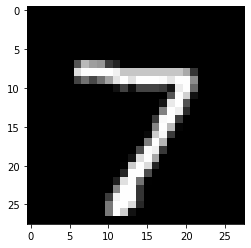

In [6]:
test_image_zero, test_target_zero = mnist_testset[0]
plt.imshow(test_image_zero, cmap ='gray')  # 灰度图像
print("该图片的标签是： ",test_target_zero)

我们已经知道，MNIST 数据集是灰度图像，而绘制出的结果也确实如此。上图展示的图片，很容易看出是一个手写的阿拉伯数字 “7”，分辨率是 $28\times28$。

多画一些，如下：

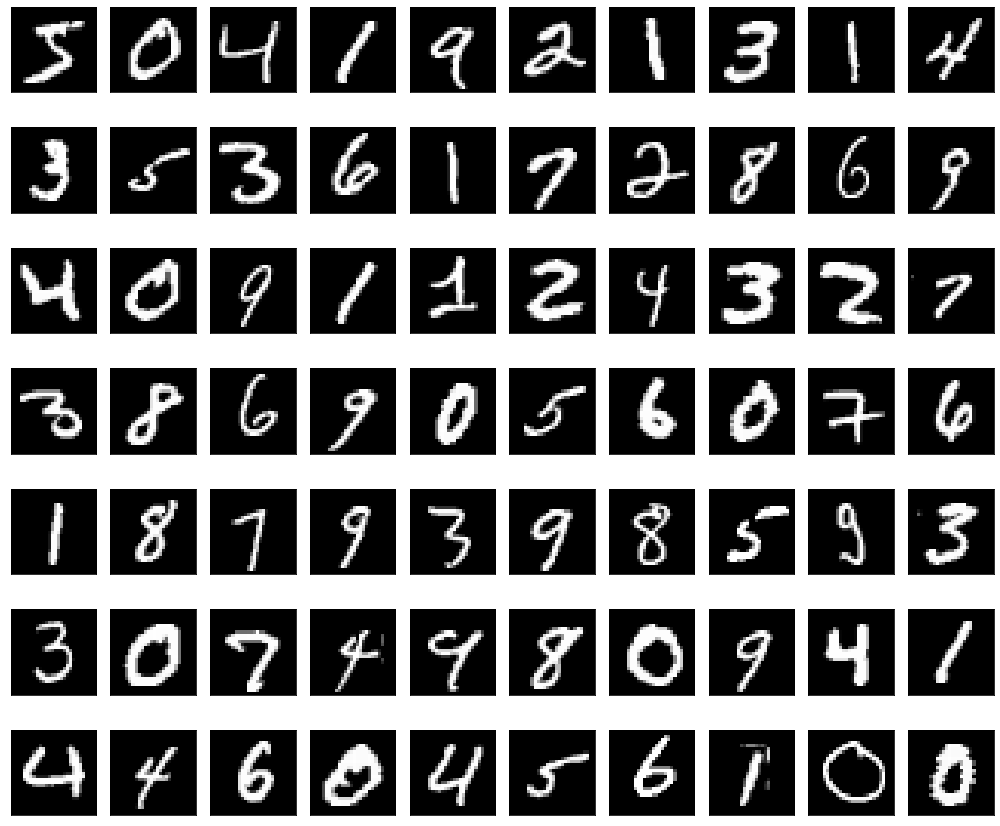

In [7]:
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7, 10, digit_num + 1)
    grid_data = mnist_trainset[digit_num][0]  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, cmap = "gray")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

## 数据集加载

在下载完毕 MNIST 数据集以后，我们要如何将数据放入神经网络中呢？

之前我们讲过，由于计算机的内存有限，在面对大规模数据集时不能一次性将所有数据放入模型进行训练，所以我们采用 mini-batch 的形式读取并训练数据集。

所以现在我们的任务是创建一个**数据迭代器（Data Iterator）**，这个迭代器的作用是每次从数据集中挑选一定量的子集（mini-batch）放入神经网络进行训练，完成这一个 batch 的训练后再挑选另一个子集的数据继续训练。

一个子集的大小叫做 “**batch size**”，它是一个超参数，具体的值需要根据显存（内存）大小来设置。

### 数据迭代器 DataLoader

PyTorch 已经为我们提供了这么一个数据迭代器类型，叫做`torch.utils.data.DataLoader`。有了这个 `DataLoader`，我们可以非常方便地把我们的数据以 mini-batch 的形式读取进来。

首先我们来看看 [DataLoader] 的结构：

```python
torch.utils.data.DataLoader(dataset, 
                            batch_size=1, 
                            shuffle=False, 
                            sampler=None, 
                            batch_sampler=None, 
                            num_workers=0, 
                            collate_fn=None, 
                            pin_memory=False, 
                            drop_last=False, 
                            timeout=0, 
                            worker_init_fn=None, 
                            multiprocessing_context=None)
```

看起来 `Dataloader` 内的参数非常多，但是在这里我们只关注几个最重要的参数，其他参数在以后需要使用的时候再讲解。

- **dataset** ([*Dataset*](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.Dataset)) – 我们将要读取的数据集。

- **batch_size** (*int, optional*) – 每一个batch中要读取多少个数据 (default: 1)。

- **shuffle** (*bool, optional*) – 在默认情况下，是按顺序进行采样的。如果要在每个 epoch 中随机打乱采样顺序，设置为`True` (default: False)。

### Tensor 格式转换

在 `torchvision.transforms` 模块中提供了非常多的图像变换、图像增强方法，包括亮度增强、拉伸缩放、旋转翻转等等。关于图像增强的方法，我们在此暂不涉及，这里我们仅仅采用 `transforms` 中的 `to_tensor()` 函数将 PIL 图像转变为 tensor 形式。

`to_tensor()` 函数将每一张 $28\times28$ 像素的手写数字图片中的灰度信息变为 tensor 的形式。 

> **Tensor**，中文名叫**张量**，是包含单一数据类型的多维矩阵，和 NumPy 中的 `np.array()` 非常类似。在 TensorFlow 和 PyTorch 中主要采用的数据结构就是tensor。具体的，PyTorch Tensor 在 CPU 和 GPU 上各有9种数据类型，可以参见[TORCH.TENSOR](https://pytorch.org/docs/stable/tensors.html#torch.Tensor)。

我们尝试将测试集第一张图片 “7” 转换为 tensor 的形式：

In [8]:
print(transforms.functional.to_tensor(test_image_zero))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [9]:
print(transforms.functional.to_tensor(test_image_zero).shape)

torch.Size([1, 28, 28])


In [10]:
print(transforms.functional.to_tensor(test_image_zero).shape[0])

1


在知道 `to_tensor()` 的工作原理之后，我们将数据转换为 tensor 并转入迭代器的步骤如下：

In [11]:
file1 = "../datasets/MNIST_pytorch/MNIST/raw/t10k-images-idx3-ubyte"
file2 = "../datasets/MNIST_pytorch/MNIST/raw/t10k-labels-idx1-ubyte"
file3 = "../datasets/MNIST_pytorch/MNIST/raw/train-images-idx3-ubyte"
file4 = "../datasets/MNIST_pytorch/MNIST/raw/train-labels-idx1-ubyte"
root = "../datasets/MNIST_pytorch/"

In [12]:
# PIL to Tensor
data_tf = transforms.Compose([transforms.ToTensor()])

# 准备数据集
if os.path.exists(file1) and os.path.exists(file2) and os.path.exists(file3) and os.path.exists(file4):
    print("已经下载。")
    mnist_trainset = datasets.MNIST(root=root, train=True, download=False, transform=data_tf)
    mnist_testset = datasets.MNIST(root=root, train=False, download=False, transform=data_tf)
else:
    print("需要下载。")
    mnist_trainset = datasets.MNIST(root=root, train=True, download=True, transform=None)
    mnist_testset = datasets.MNIST(root=root, train=False, download=True, transform=None) 

# 放入迭代器
train_loader = DataLoader(mnist_trainset, batch_size=1000, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size=1000, shuffle=True)

已经下载。


构建好了训练集和测试集的迭代器以后，我们就做好了数据的准备工作了。

## 搭建网络结构

在 [3.01 神经网络与前向传播](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.01%20神经网络与前向传播.ipynb) 中，我们当时搭建了一个非常简单的三层神经网络，每一层神经元只有仅仅两三个。

神经元的数量少，有利于我们推导前向传播公式，理解神经网络结构，但要解决真实问题却不太够。因此今天我们将要搭建一个神经元更多一些的三层神经网络，如下图：

![三层网络](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/back_up_images/%E4%B8%89%E5%B1%82%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C-%E5%A4%9A%E4%B8%AA%E7%A5%9E%E7%BB%8F%E5%85%83.png?raw=true)

可以看到，在全连接层中，随着神经元的增加，神经网络变得更加复杂了起来。但是层数依旧是三层。

> 需要注意的是，在输出层我们采用了 `softmax` 函数，以输出图像每个数字分类的概率。

现在我们按照上图中的说明，正式开始搭建神经网络：

In [13]:
class Net(nn.Module):
    """定义神经网络Net"""
    def __init__(self):
        """初始化各个层"""
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=10)

    def forward(self, x):
        """定义前向传播"""
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

### 检查系统状态

检查 PyTorch 版本和 GPU 状态：

In [14]:
# check GPU in PyTorch

print(f"Is CUDA available:       {torch.cuda.is_available()}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    n_gpu = torch.cuda.device_count()
    print(f"GPU numbers:             {n_gpu}")
    print(f"device_name:             {torch.cuda.get_device_name(0)}")
    print(f"Current device index:    {torch.cuda.current_device()}")

Is CUDA available:       True
GPU numbers:             1
device_name:             GeForce GTX 1070
Current device index:    0


### 优化器的设置

首先，我们需要将定义好的神经网络模型放入 `device` 中，这个 `device` 之前已经由我们编程选择好了，如果电脑的GPU可用，则会选择放入GPU，如果不可用则会选择放入CPU。

其次我们需要给神经网络选择一个优化器。之前我们学习过，普通的神经网络会最常见的的优化方法就是随机梯度下降法（Stochastic Gradient Descent，SGD），从而减小损失函数。因此这里我们也使用随机梯度下降法来作为我们的优化器。后续我们会讨论其他类型的优化器。

> 实际上还有很多优化器，SGD 只是最常见的优化器之一。可以参见[TORCH.OPTIM](https://pytorch.org/docs/stable/optim.html?highlight=sgd#module-torch.optim)。

In [15]:
model = Net()
model.to(device)  # 放入device
optimizer = optim.SGD(model.parameters(),    # 模型参数
                      lr=0.03,               # 学习率
                      momentum=0)            # 动量

### 定义训练函数

在设置完毕优化器之后，我们开始定义整个模型需要如何训练。

#### model.train()

需要了解的是，PyTorch 的模型在训练之前需要使用命令

```python
model.train()
```

来对模型开启训练模式。

#### 将 mini-batch 数据放入device

之前我们使用 `to(device)` 命令将模型放入了 device 中（如果你的GPU可用，那么这里 device 是 GPU，否则是CPU）。我们还需要将训练数据和标签也放入 device 中。这样一来，模型和数据都在 device 中，我们的模型才能正常读取数据并训练。

由于之前我们将数据和标签放入了一个迭代器中，所以要分批获取这些数据并放入 device 中。故这里需要使用一个 `for` 循环，按 batch_size 处理我们的数据。

> **重要**：关于数据维度的变化：`data = data.view(data.shape[0], -1)` 的操作，将原本是 $28\times28$ 的图像拉平（flatten）到了 $768$。因为在我们定义的神经网络中，第一层接受的是一个 $768$ 维的输入，而 data 原本的维度是 $1000\times1\times28\times28$。

#### 梯度归零

在 PyTorch 训练过程中，每训练一个 batch 的数据，我们的优化器需要使用 `optimizer.zero_grad()` 进行梯度归零。回顾之前学习的梯度下降法，每次学习的梯度只对本 batch 数据负责，到了下一个 batch 我们又需要将梯度归零，然后重新计算梯度。

如果不执行梯度归零，那么每个 batch 的梯度会累加起来，导致结果出错。

#### 反向传播

接下来我们定义损失函数。这里我们采用的是 [NLLLoss](https://pytorch.org/docs/stable/nn.functional.html?highlight=nll_loss#torch.nn.functional.nll_loss)，即 “Negative Log Likelihood loss”。它和之前的交叉熵损失函数（Cross Entropy Loss）是一回事。在 PyTorch 中，[torch.nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/nn.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss) 结合了 `nn.LogSoftmax()` 和 `nn.NLLLoss()`。

换句话说，`torch.nn.CrossEntropyLoss()` 会额外计算一次 softmax ，由于我们在网络的末尾定义了 log_softmax() 输出，所以只需要 `nn.NLLLoss()` 就足够了。

最后我们要记得使用 `optimizer.step()` 更新模型的参数。[torch.optim.Optimizer.step](https://pytorch.org/docs/stable/optim.html?highlight=optimizer%20step#torch.optim.Optimizer.step) 表示单步（一个 batch 的数据）更新模型的参数。

#### 打印 loss 值

有时候我们需要在训练过程中看看模型的 loss 是否在下降，所以采用打印 loss 的方式来观察，简单有效。

In [16]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)  # 从 28*28 转换为 768
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} \
                  [{batch_idx * len(data):5.0f}/{len(train_loader.dataset)} \
                  ({100. * batch_idx / len(train_loader):1.0f}%)]\tLoss: {loss.item():1.6f}')

In [17]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:            
            data, target = data.to(device), target.to(device)
            data = data.view(data.shape[0], -1)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(f'\nTest set: Average loss: {test_loss}, \
            Accuracy: {correct}/{len(test_loader.dataset)} \
            ({100. * correct / len(test_loader.dataset)}%)\n')

In [18]:
model.zero_grad()  # 如果有必要

for epoch in tqdm_notebook(range(1, 10)):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

#if (args.save_model):
#    torch.save(model.state_dict(),"mnist_cnn.pt")

Train Epoch: 1                   [    0/60000                   (0%)]	Loss: 2.301521
Train Epoch: 1                   [10000/60000                   (17%)]	Loss: 2.293252
Train Epoch: 1                   [20000/60000                   (33%)]	Loss: 2.282645
Train Epoch: 1                   [30000/60000                   (50%)]	Loss: 2.273658
Train Epoch: 1                   [40000/60000                   (67%)]	Loss: 2.261808
Train Epoch: 1                   [50000/60000                   (83%)]	Loss: 2.251184

Test set: Average loss: 2.2364312744140626,             Accuracy: 3334/10000             (33.34%)

Train Epoch: 2                   [    0/60000                   (0%)]	Loss: 2.234012
Train Epoch: 2                   [10000/60000                   (17%)]	Loss: 2.223125
Train Epoch: 2                   [20000/60000                   (33%)]	Loss: 2.200705
Train Epoch: 2                   [30000/60000                   (50%)]	Loss: 2.178910
Train Epoch: 2                   [40000/60

## 保存模型

在完成了模型的训练之后，我们需要将模型保存下来，以便后续使用。

参考代码：[SAVING AND LOADING MODELS](https://pytorch.org/tutorials/beginner/saving_loading_models.html?highlight=save)

### 状态字典 state_dict

在 PyTorch 中，`torch.nn.Module` 模型的可学习参数（权重和偏差）包含在模型的参数（parameters）中，可以通过 `model.parameters()` 访问。 

*state_dict* 是一个 Python 的字典（dictionary ）对象，它将每个 layer 映射到字典里面。

由于 *state_dict* 是 Python字典，所以可以轻松保存、更新、更改以及还原模型。

In [19]:
# 打印模型的 state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    
# 打印优化器的 state_dict
print("\nOptimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
fc1.weight 	 torch.Size([100, 784])
fc1.bias 	 torch.Size([100])
fc2.weight 	 torch.Size([50, 100])
fc2.bias 	 torch.Size([50])
fc3.weight 	 torch.Size([10, 50])
fc3.bias 	 torch.Size([10])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.03, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [140107954632336, 140107954634336, 140107954634576, 140107954632256, 140107954633216, 140107954633296]}]


### 保存和读取模型

我们推荐使用保存、读取 `state_dict` 的形式来存取模型。

方法如下：

**Save**：

```python
torch.save(model.state_dict(), PATH)
```

**Load**

```python
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
```

在保存模型，以便以后复用的时候，我们实际上只需要保存经过训练的模型的学习参数（$W$ 以及 $b$），所以使用 `torch.save()` 函数保存模型的 *state_dict* 会非常方便灵活。

> 记住，读取模型以后需要调用 `model.eval()` 进入评估模式，否则可能出现不一样的预测结结果。

In [20]:
PATH = "./model_save_3.04/model_save_3.04"

torch.save(model.state_dict(), PATH)

这里，由于我们之前采用了 

```python
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
```
对我们的设备进行判断，如果 GPU 可用则在 GPU 上训练，否则在 CPU 上训练，因此这里我们也需要配套处理读取后模型的位置。参考：[Saving & Loading Model Across Devices](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-across-devices)

> 为了区分，我们将读取后的模型叫做 *model_2* 。

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_2 = Net()
model_2.load_state_dict(torch.load(PATH, map_location=device))
model_2.to(device)
model_2.eval()

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)

接下来测试一下读取后的模型效果。



In [22]:
test(model_2, device, test_loader)


Test set: Average loss: 0.46077713623046873,             Accuracy: 8727/10000             (87.27%)



最后，如果结束训练，记得释放显存:

In [23]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Keras - 训练MNIST

>Keras 是一个更上层的框架，将常用的深度学习层和运算封装进干净的、积木一样的构造块，使数据科学家不用再考虑深度学习的复杂度。
>
>PyTorch 提供一个相对较低级别的实验环境，使用户可以更加自由地写自定义层、查看数值优化任务。
>
>链接：https://zhuanlan.zhihu.com/p/38710857

我鼓励大家在 Keras 和 PyTorch 中都尝试下简单的深度学习模型。这里我同样给出 MNIST 在 Keras 上面的较为简单的训练过程代码，参考了 [TensorFlow 2 quickstart for beginners](https://tensorflow.google.cn/tutorials/quickstart/beginner)。

In [25]:
import tensorflow as tf
import os

tf.test.is_gpu_available()

False

### 导入数据集

[MNIST 数据集](http://yann.lecun.com/exdb/mnist/)的读取接口已经内置在 TensorFlow 中，如果数据文件不存在，会自动下载。

我们读取数据集，然后将数据集从整数转换为浮点数。

In [26]:
file = "../datasets/MNIST_tf2.0/mnist.npz"
print(f"文件是否存在：{os.path.exists(file)}")
file_path = os.path.abspath(file)

文件是否存在：True


In [27]:
mnist = tf.keras.datasets.mnist

if os.path.exists(file):
    (x_train, y_train), (x_test, y_test) = mnist.load_data(path=file_path)
else:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [29]:
print(len(x_train))
print(len(x_test))

60000
10000


### 搭建模型

使用 [tf.keras.Sequential](https://tensorflow.google.cn/api_docs/python/tf/keras/Sequential?version=stable) 搭建模型。

然后选择合适的优化器（optimizer ）和损失函数（loss function）。

具体结构和上文 PyTorch 搭建的模型一致：

```
Model：
Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)
```

In [30]:
tfmodel = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

tfmodel.compile(optimizer='SGD',                         # SGD优化器
                loss='sparse_categorical_crossentropy',  # 交叉熵损失
                metrics=['accuracy'])                    # 评价指标

### 训练和预测

首先我们使用 `scheduler` 指定学习率，然后放入 `model.fit` 中。

> `scheduler` 可以起到在不同的 epoch 中控制学习率变化的作用，有时候需要 warm up，或者在最后几个 epoch 收缩学习率的时候会用到。参见[tf.keras.callbacks.LearningRateScheduler](https://tensorflow.google.cn/api_docs/python/tf/keras/callbacks/LearningRateScheduler?hl=en&version=stable)。

In [31]:
def scheduler(epoch):
    return 0.03

In [32]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
tfmodel.fit(x_train, y_train, epochs=10, callbacks=[callback], verbose=2)

tfmodel.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 2s - loss: 0.4088 - accuracy: 0.8850
Epoch 2/10
60000/60000 - 1s - loss: 0.1979 - accuracy: 0.9421
Epoch 3/10
60000/60000 - 1s - loss: 0.1466 - accuracy: 0.9570
Epoch 4/10
60000/60000 - 1s - loss: 0.1171 - accuracy: 0.9651
Epoch 5/10
60000/60000 - 1s - loss: 0.0971 - accuracy: 0.9715
Epoch 6/10
60000/60000 - 1s - loss: 0.0828 - accuracy: 0.9750
Epoch 7/10
60000/60000 - 1s - loss: 0.0718 - accuracy: 0.9785
Epoch 8/10
60000/60000 - 1s - loss: 0.0629 - accuracy: 0.9815
Epoch 9/10
60000/60000 - 1s - loss: 0.0561 - accuracy: 0.9833
Epoch 10/10
60000/60000 - 1s - loss: 0.0497 - accuracy: 0.9851
10000/1 - 0s - loss: 0.0400 - accuracy: 0.9759


[0.07953799886242487, 0.9759]

于是我们得到结果。可以看出 Keras 和 PyTorch 相比，似乎准确率更高一些。

但是，请注意，这产生这些区别的**原因很多**，可能是 Keras 优化器内部参数设置不一致，并非框架本身的问题。

### 模型保存与读取

接下来是 Keras 的模型保存，需要指定好保存的路径。

#### 保存

保存方法如下，参考文档 [tf.keras.models.save_model](https://tensorflow.google.cn/api_docs/python/tf/keras/models/save_model?hl=en&version=stable)。

```python
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)
```

In [33]:
tf.keras.models.save_model(
    tfmodel,
    filepath="./model_save_3.04/model_save_3.04_tf",
    overwrite=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model_save_3.04/model_save_3.04_tf/assets


#### 读取

模型的读取方法如下，参考文档 [tf.keras.models.load_model](https://tensorflow.google.cn/api_docs/python/tf/keras/models/load_model?hl=en&version=stable)：

In [34]:
tfmodel_2 = tf.keras.models.load_model(
                                        filepath="./model_save_3.04/model_save_3.04_tf",
                                        custom_objects=None,
                                        compile=True)

In [35]:
tfmodel_2.summary()  # 查看模型结构

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
